In [127]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
from PIL import Image
import random
from IPython.display import display


def add_noise(array: np.ndarray, dropout_rate: float = 0.10) -> np.ndarray:
    """
    This function adds noise
    :param array:
    :param dropout_rate: percent of pixels to be dropped
    :return:
    """
    assert len(array.shape) == 4
    assert array.shape[1] == 3

    channels = array.shape[1]
    height = array.shape[2]
    width = array.shape[3]

    total_pixels = height * width
    queued_pixels = int(total_pixels * dropout_rate)

    filled_pixels = 0
    while filled_pixels < queued_pixels:
        d_h = random.randint(1, 3)
        d_w = random.randint(1, 3)
        filled_pixels += d_h * d_w
        h = random.randint(0, height - d_h)
        w = random.randint(0, width - d_w)

        # now overwrite selected pixels with random dark color
        array[:, :, h:h+d_h, w:w+d_w] = random.randint(1, 25) / 255.0

    return array


def array_to_image(array: np.ndarray):
    """
    This function converts NumPy array to image
    :param array:
    :return:
    """
    assert len(array.shape) == 4
    assert array.shape[1] == 1 or array.shape[1] == 3

    scaled = (array * 255.0).astype(np.uint8)
    if array.shape[1] == 1:
        reshaped = scaled.reshape((array.shape[2], array.shape[3]))
        return Image.fromarray(reshaped,"L")
    else:
        reshaped = scaled.reshape((3, array.shape[2], array.shape[3])).transpose([1, 2, 0])
        return Image.fromarray(reshaped,"RGB")


def image_to_array(image) -> np.ndarray:
    """
    This function converts image to NumPy array
    :param image:
    :return:
    """
    return np.expand_dims(np.asarray(image), 0).astype(np.float) / 255.0


def sample_grayscale(filepath: str, height: int = 128, width: int = 128) -> np.ndarray:
    """
    This method samples patch out of image
    :param filepath:
    :param height:
    :param width:
    :return:
    """
    image = Image.open(filepath)
    grayscale = image.convert('L')
    g_array = np.expand_dims(np.asarray(grayscale), 0).astype(dtype=np.float32) / 255.0
    g_array = np.expand_dims(g_array, 0)
    h = random.randint(0, g_array.shape[2] - height)
    w = random.randint(0, g_array.shape[3] - width)
    return g_array[:, :, h:h+height, w:w+width]


def sample_rgb(filepath: str, height: int = 128, width: int = 128) -> np.ndarray:
    """
    This method samples patch out of image
    :param filepath:
    :param height:
    :param width:
    :return:
    """
    image = Image.open(filepath)
    rgb_array = np.expand_dims(np.asarray(image).transpose([2, 0, 1]), 0).astype(dtype=np.float32) / 255.0
    h = random.randint(0, rgb_array.shape[2] - height)
    w = random.randint(0, rgb_array.shape[3] - width)
    return rgb_array[:, :, h:h+height, w:w+width]



'Original image:'

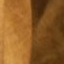

'Noisy image:'

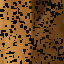

'Denoised image:'

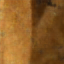

In [161]:
original = sample_rgb("/data/px/frames/Desperado/output140.jpg", 64, 64)
original_image = array_to_image(original)
input = add_noise(original, 0.30)
input_image = array_to_image(input)

display("Original image:")
display(original_image)

display("Noisy image:")
display(input_image)

model = k.models.load_model("/data/models/denoiser.h5")
result = model.predict(input)

output = array_to_image(result)
display("Denoised image:")
display(output)